<a href="https://colab.research.google.com/github/yanFORray/py_data/blob/main/AB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
#Подгружаем данные с гугл диска
from google.colab import drive



data = pd.read_csv('/content/sample_data/AB_Test_Results (2) - AB Test Results.csv')


data.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,"0,00"
1,2423,control,"0,00"
2,9411,control,"0,00"
3,7311,control,"0,00"
4,6174,variant,"0,00"
5,2380,variant,"0,00"
6,2849,control,"0,00"
7,9168,control,"0,00"
8,6205,variant,"0,00"
9,7548,control,"0,00"


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   USER_ID       10000 non-null  int64 
 1   VARIANT_NAME  10000 non-null  object
 2    REVENUE      10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [26]:
data.shape

(10000, 3)

In [29]:
print(data.columns)

Index(['USER_ID', 'VARIANT_NAME', ' REVENUE'], dtype='object')


,USER_ID
count,10000.000000
mean,4981.080200
std,2890.590115
min,2.000000
25%,2468.750000
50%,4962.000000
75%,7511.500000
max,10000.000000


In [18]:
data.isna().sum()

USER_ID         0
VARIANT_NAME    0
 REVENUE        0
dtype: int64

In [19]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [34]:

data = data.rename(columns={' REVENUE': 'REVENUE'})


In [45]:
data['REVENUE'] = pd.to_numeric(data['REVENUE'])

In [46]:
revenue_sum = data.groupby('VARIANT_NAME')['REVENUE'].sum()

print(revenue_sum)

VARIANT_NAME
control    643.00
variant    351.47
Name: REVENUE, dtype: float64


In [48]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [53]:
revenue_by_variant = data.groupby('VARIANT_NAME')['REVENUE'].mean()

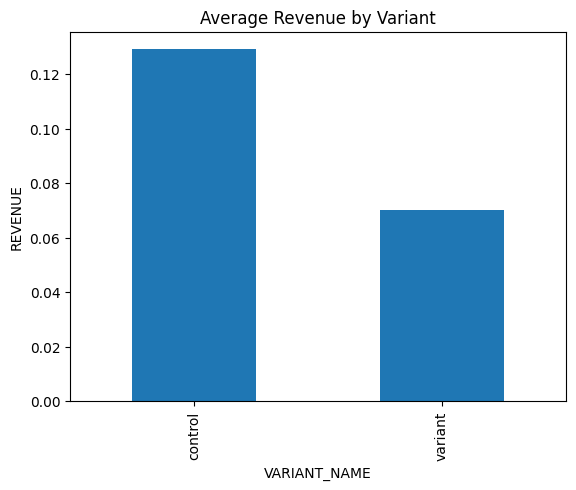

In [55]:


# График среднего дохода для каждого VARIANT_NAME
revenue_by_variant.plot(kind='bar', xlabel='VARIANT_NAME', ylabel='REVENUE', title='Average Revenue by Variant')
plt.show()



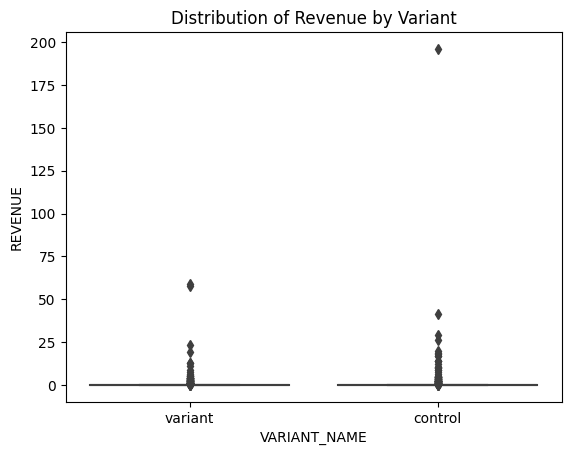

In [57]:
sns.boxplot(x='VARIANT_NAME', y='REVENUE', data=data)
plt.title('Distribution of Revenue by Variant')
plt.show()